In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
import sklearn
from sklearn.manifold import TSNE
name = 'mpairs'

In [67]:
real_latent_pd=pd.read_csv('../app/M_pairs_airplane_4exp_13epoch_0abnidx_real_latent_test.csv')
fake_latent_pd=pd.read_csv('../app/M_pairs_airplane_4exp_13epoch_0abnidx_fake_latent_test.csv')

N = 500
latents = []
for i in range(9):
    real_latent = real_latent_pd[real_latent_pd.labels==i]
    real_latent = np.array(real_latent[:])[:, 1:-1]
    real_latent = real_latent[:N]
    latents.append(real_latent)

for i in range(9):
    fake_latent = fake_latent_pd[fake_latent_pd.labels==i]
    fake_latent = np.array(fake_latent[:])[:, 1:-1]
    fake_latent = fake_latent[:N]
    latents.append(fake_latent)
    
latents = np.vstack(latents)
print(latents.shape)


latent_embed = TSNE(n_components=2).fit_transform(latents)

(9000, 32)


(4500, 2)


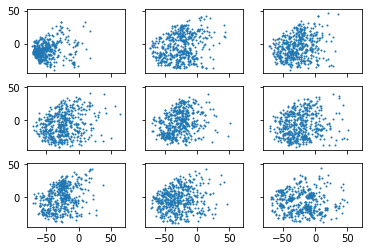

In [69]:
fig, ax_grid = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, squeeze=False)
row = [0,0,0,1,1,1,2,2,2]
column = [0,1,2,0,1,2,0,1,2]
real_latent_embed = latent_embed[:9*N, :]
print(real_latent_embed.shape)
for i in range(9):
    ax_grid[row[i],column[i]].scatter(real_latent_embed[i*N:(i+1)*N,0], 
                                      real_latent_embed[i*N:(i+1)*N,1],label='i',s=1)
plt.savefig(name+'real.png')
plt.show()

(4500, 2)


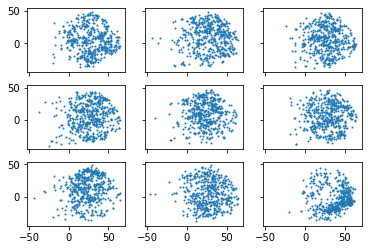

In [70]:
fig, ax_grid = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, squeeze=False)
row = [0,0,0,1,1,1,2,2,2]
column = [0,1,2,0,1,2,0,1,2]
fake_latent_embed = latent_embed[9*N:, :]
print(fake_latent_embed.shape)
for i in range(9):
    ax_grid[row[i],column[i]].scatter(fake_latent_embed[i*N:(i+1)*N,0], 
                                      fake_latent_embed[i*N:(i+1)*N,1],label='i',s=1)
plt.savefig(name+'fake.png')
plt.show()

(4500, 2)


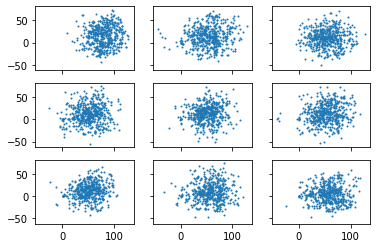

In [71]:
fig, ax_grid = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, squeeze=False)
row = [0,0,0,1,1,1,2,2,2]
column = [0,1,2,0,1,2,0,1,2]
diff_latent = fake_latent_embed - real_latent_embed
print(diff_latent.shape)
for i in range(9):
    ax_grid[row[i],column[i]].scatter(diff_latent[i*N:(i+1)*N,0], 
                                      diff_latent[i*N:(i+1)*N,1],label='i',s=1)
plt.savefig(name+'diff.png')
plt.show()

(4500, 2)


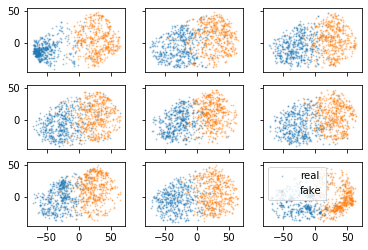

In [72]:
fig, ax_grid = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, squeeze=False)
row = [0,0,0,1,1,1,2,2,2]
column = [0,1,2,0,1,2,0,1,2]
diff_latent = fake_latent_embed - real_latent_embed
print(diff_latent.shape)
for i in range(9):
    ax_grid[row[i],column[i]].scatter(real_latent_embed[i*N:(i+1)*N,0], 
                                      real_latent_embed[i*N:(i+1)*N,1],label='real', alpha=0.3,  s=1)
    
    ax_grid[row[i],column[i]].scatter(fake_latent_embed[i*N:(i+1)*N,0], 
                                      fake_latent_embed[i*N:(i+1)*N,1],label='fake', alpha=0.3, s=1)
plt.legend()

plt.savefig(name+'vis.png')
plt.show()